# ICT 782 - Day 5 Notes

# Plotting and Visualization

basic rules of thumb

## Matplotlib

Though there are many sophisticated plotting packages for Python, Matplotlib is *the* foundational plotting package. Based on NumPy, Matplotlib works beautifully with pandas objects. There are many modules contained in Matplotlib. For general plotting, we'll import the Pyplot module under the alias `plt`.

The cell magic `%matplotlib inline` tells the Jupyter notebook to allow plotting after the cell in which it is called.

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 Before we dig into the details of the package, let's see an example.

### Loading and displaying images with Matplotlib

As mentioned briefly on Day 1, Matplotlib has Matlab-like tools for loading and displaying images. Using the `image` module of Matplotlib, we can call the `imread(<filepath>)` function to load an image into the interpreter. We then use the `imshow()` function from the `pyplot` module to display the image. I often place a semi-colon after the `imshow()` function is called to suppress printing the object type to the console.

Since the `cameraman.jpg` image is grayscale, we'll specify the colormap using the keyworded argument `cmap = 'gray'`.

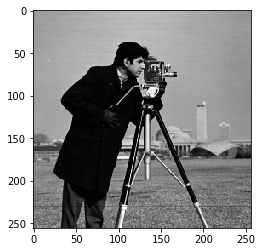

In [5]:
import matplotlib.image as mp

im = mp.imread('cameraman.jpg')
plt.imshow(im, cmap = 'gray');

## Matplotlib objects: the structure of plots

There are, of course, shortcuts to plotting with Matplotlib. However, understanding the underlying structure of Matplotlib plots opens a much wider range of customizable plots. In this section, we'll explore the fundamental objects in Matplotlib.

### The `figure` object

The most basic object in Matplotlib is the `figure`. This object contains attributes for the plotting metadata such as the axes, the plot resolution, the size of the plot, and the background color. When we generate a `figure`, we can also specify its `number` attribute so that we can access various `figure` objects by their `number`. All plotting metadata attributes can be passed as keyworded arguments, and are summarized in the following table.

|Optional Attribute|Options|Details|Default|
|---|---|---|---|
|`num`|Integer or string|Sets the `number` attribute for the `figure` object|`None`|
|`figsize`|`(float, float)`|Sets the size of the `figure` object to `(width, height)` *in inches*.|`(6.4, 4.8)`|
|`dpi`|Integer|Sets the `figure` resolution in *dots per inch*.|`100`|
|`facecolor`|Specified color or RGB tuple.|`w`, `white`<br>`r`, `red`<br>`g`, `green`<br>`b`, `blue`<br>`c`, `cyan`<br>`y`, `yellow`<br>`m`, `magenta`<br>`k`, `black`|Sets the background color of the `figure`.|`w` or `white`|
|`edgecolor`|Specified color or RGB tuple.|(see `facecolor`)|Sets the border color of the `figure`.|`w` or `white`|
|`frameon`|`bool`|`True`, `False`|If `False`, don't draw the frame of the `figure` object.|`True`|

In [6]:
fig1 = plt.figure(num = 1, 
                  figsize = (10, 5), 
                  dpi = 250, 
                  facecolor = 'm', 
                  edgecolor = 'k')

<Figure size 2500x1250 with 0 Axes>

Note that we passed in *inches* for the `figsize` attribute, but the `figure` has its size determined by `pixels`. This is because the `dpi` value is literally *dots per inch*. In other words, we specify the pixels per square inch and the `figsize`, and the Python interpreter does the arithmetic for us.

When `fig1` was generated, the console output was `<Figure size 2500x1250 with 0 Axes>`. This tells us that we have an empty `figure` object. We'll now focus on the second important object in Matplotlib: the `axes` object.

### The `axes` object

With a `figure` generated, we can place an `axes` object onto it. Think of this as creating a canvas (generating the `figure`) and then preparing an area of the canvas for your painting (generating the `axes`). We will use the `add_subplot()` method of the `figure` object to add an `axes` to our `figure`.

In [7]:
ax1 = fig1.add_subplot()

We didn't specify any arguments for the `add_subplot()` method. However, the default argument is `1,1,1` or, equivalently, `111`. These positional arguments are *not* specified in the official documentation as keyworded arguments, which makes them unnecessarily vague. However, they mean `number_of_rows, number_of_columns, index`. In other words, they specify the number of sub-plots our `figure` will have and the position of our generated `axes` object.

By passing in `1,1,1`, we are telling the `figure` that we want a sub-plot with 1 row, 1 column, and the `axes` object is in index position 1. Index positions are read left-to-right, top-to-bottom.

### *Example:* Plotting with `figure` and `axes` objects

This might be confusing, so let's actually plot some `axes` to see what's going on. We'll create a new `figure` and two `axes` objects. To identify our `axes` positions, we'll use the `set_title()` method.

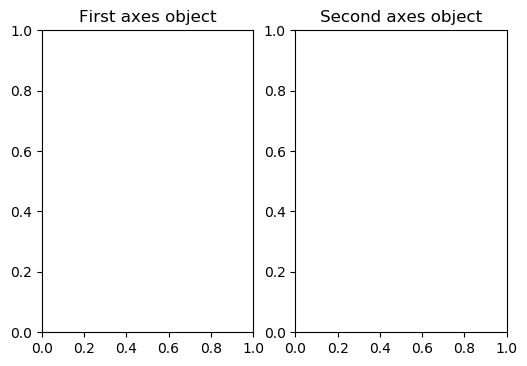

In [8]:
fig = plt.figure(num = 2, 
                 figsize = (6, 4), 
                 dpi = 100, 
                 facecolor = 'w', 
                 edgecolor = 'k')

# Here we state that our figure has 1 row, 2 columns.
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('First axes object');
ax2.set_title('Second axes object');

The above code to generate the `figure` and `axes` objects is largely illustrative. In practice and in tutorials, we most often see the `figure` and `axes` declared in one line.

**Note:** Generating a `figure` with more than one row or column results in the creation of an *array* of `axes` objects. We can access individual `axes` objects in this array by indexing.

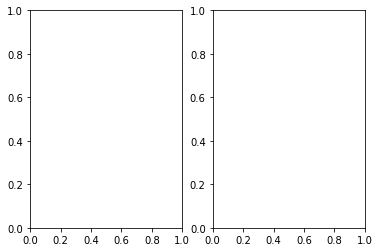

In [9]:
fig, ax = plt.subplots(1,2)

In [10]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B05AA3AF88>,
      dtype=object)

In [11]:
ax[0]

### `axes` methods

In the simplest cases, we'll be plotting some numeric values. An example of this is plotting the function $f(x) = x^2$, where $x$ is an array of 100 values between 0 and 1.

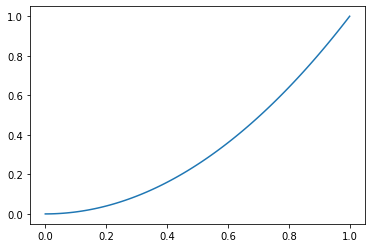

In [12]:
fig, ax = plt.subplots()

x = np.linspace(0,1,100)
y = x**2

ax.plot(x,y);

To plot individual data points instead of a smooth curve, we use the `scatter()` method.

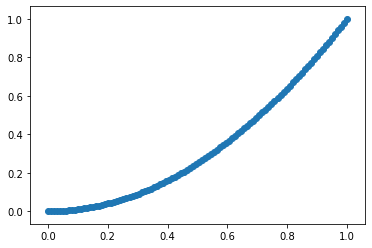

In [13]:
fig, ax = plt.subplots()

x = np.linspace(0,1,100)
y = x**2

ax.scatter(x,y);

That's looking a little dense, so we can either reduce the number of points in `x` or change the `marker` to make the points easier to see.

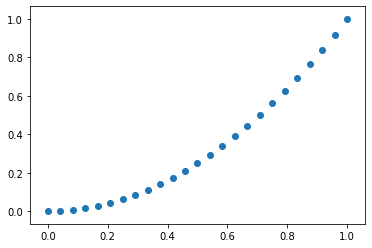

In [14]:
# Reducing the number of points.

fig, ax = plt.subplots()

x = np.linspace(0,1,25)
y = x**2

ax.scatter(x,y);

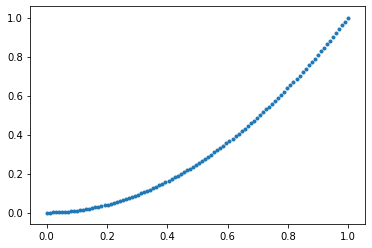

In [15]:
# Changing the marker.

fig, ax = plt.subplots()

x = np.linspace(0,1,100)
y = x**2

ax.scatter(x,y, marker = '.');

The full list of markers is listed below (from the official documentation). Some examples are plotted below for clarification.

|Marker|Details|
|---|---|
|`'.'`|point|
|`','`|pixel|
|`'o'`|circle|
|`'v'`|triangle_down|
|`'^'`|triangle_up|
|`'<'`|triangle_left|
|`'>'`|triangle_right|
|`'1'`|tri_down|
|`'2'`|tri_up|
|`'3'`|tri_left|
|`'4'`|tri_right|
|`'s'`|square|
|`'p'`|pentagon|
|`'*'`|star|
|`'h'`|hexagon1|
|`'H'`|hexagon2|
|`'+'`|plus|
|`'x'`|x|
|`'D'`|diamond|
|`'d'`|thin_diamond|
|'&#124;'|`vline`|
|`'_'`|`hline`|

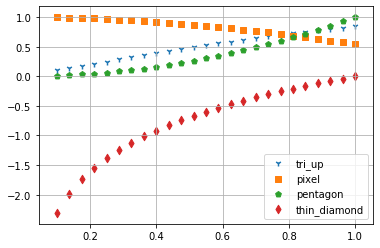

In [16]:
fig, ax = plt.subplots()

x = np.linspace(0.1,1,25)

funcs = [np.sin(x), np.cos(x), x**2, np.log(x)]
marks = ['1',',','p','d']
legs = ['tri_up','pixel','pentagon','thin_diamond']

for f, m, leg in zip(funcs, marks, legs):
    ax.scatter(x, f, marker = m, label = leg)

ax.grid()
ax.legend();

This example illustrates 3 things:
1. We can add a legend to the `axes` with the `legend()` method. The values in the legend are set by the `label` parameter in the plotting method.
2. Creating a grid is done with the `grid()` method.
3. We can overlay plots by simply plotting again after a single plot has been created.

Titles and axis labels can be added using the `set_title()`, `set_xlabel()`, and `set_ylabel()` methods.

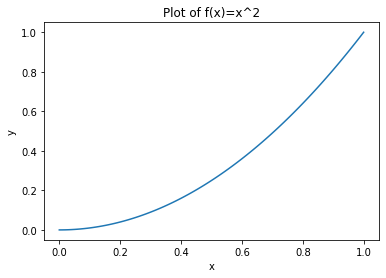

In [17]:
fig, ax = plt.subplots()

x = np.linspace(0,1,100)
y = x**2

ax.plot(x,y);
ax.set_title('Plot of f(x)=x^2');
ax.set_xlabel('x');
ax.set_ylabel('y');

While this simple text is often enough for most cases, we can use LaTeX formatting for improved rendering of mathematical expressions.

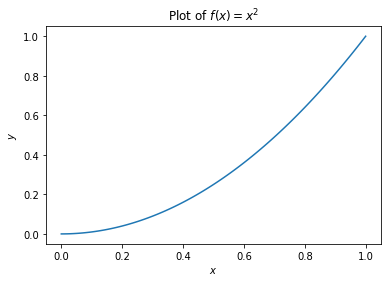

In [18]:
fig, ax = plt.subplots()

x = np.linspace(0,1,100)
y = x**2

ax.plot(x,y);
ax.set_title(r'Plot of $f(x)=x^2$');
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');

## Styling text in plots

There are even more options for setting the style of titles, axes, and legends within plots. To see the full range of pre-formatted options, we print the list of styles contained in `plt.style.available`. To choose a style, use `plt.style.use('<style name>')`.

In [19]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


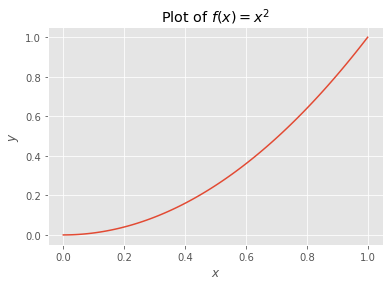

In [20]:
plt.style.use('ggplot')

fig, ax = plt.subplots()

x = np.linspace(0,1,100)
y = x**2

ax.plot(x,y);
ax.set_title(r'Plot of $f(x)=x^2$');
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');

## Plotting from `DataFrame`s

There are many more methods for plotting using `axes` objects. We can use these methods on `DataFrame` objects by either calling the corresponding `DataFrame` method, or by passing data to `axes` methods.

For this example, we'll grab the 'World Population by Continent' dataset from Wikipedia.

In [90]:
url = 'https://en.wikipedia.org/wiki/World_population'

data3 = pd.read_html(url, match = 'Population by continent')

In [91]:
pop = data3[0]
pop

Continent Density(inhabitants/km2)  \
0                   Asia                     96.4   
1                 Africa                     36.7   
2                 Europe                     72.9   
3  North America[note 2]                     22.9   
4          South America                     22.8   
5                Oceania                      4.5   
6             Antarctica           0.0003(varies)   

                         Population(millions)  \
0                                        4436   
1                                        1216   
2                                         738   
3                                         579   
4                                         422   
5                                        39.9   
6  0.004 in summer(non-permanent, varies)[16]   

                               Most populous country  \
0                      1,382,300,000[note 1] – China   
1                             0186,987,000 – Nigeria   
2  0145,939,000 – Russia;approx. 112 million in E...   
3                       0324,991,600 – United States   
4                              0209,567,000 – Brazil   
5                           0024,458,800 – Australia   
6                                        N/A[note 3]   

              Most populous city (metropolitan area)  
0  35,676,000/13,634,685 – Greater Tokyo Area/Tok...  
1                                 21,000,000 – Lagos  
2  16,855,000/12,506,468 – Moscow metropolitan ar...  
3  23,723,696/8,537,673 – New York Metropolitan A...  
4  27,640,577/11,316,149 – Metro Area/São Paulo City  
5                                 5,005,400 – Sydney  
6    1,200 (non-permanent, varies) – McMurdo Station

In [92]:
# A little light cleaning

# Only keep the Continent, Density, and Population columns, and drop Antarctica
pop.drop(index = 6, axis = 0, inplace = True)
pop.drop(columns = ['Most populous country','Most populous city (metropolitan area)'], axis = 1, inplace = True)

# Remove the '[note 2]' from the Continent column
pop['Continent'] = pop['Continent'].apply(lambda x: x.replace('[note 2]',''))

# Rename the columns; convert numeric columns to float
pop.columns = ['Continent', 'Density', 'Population']
pop = pop.apply({'Continent': str, 'Density': float, 'Population': float})

# Set the index to Continent and drop the Continent column
pop.index = pop['Continent']
pop.drop(columns = 'Continent', axis = 1, inplace = True)

# View the cleaned data
pop

Density  Population
Continent                         
Asia              96.4      4436.0
Africa            36.7      1216.0
Europe            72.9       738.0
North America     22.9       579.0
South America     22.8       422.0
Oceania            4.5        39.9

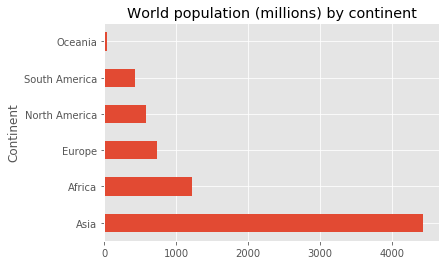

In [98]:
pop['Population'].plot(kind = 'barh',
                       title = 'World population (millions) by continent');

Many different plots can be generated from pandas objects. The `plot()` method is essentially a *wrapper* for Matplotlib, meaning it serves as a go-between for using Matplotlib. Therefore, knowing Matplotlib should make plotting pandas objects easier to customize.

## Saving plots

A variety of file formats are available for storing Matplotlib plots. Some common file extensions for pixel-based images are `.jpg`, `.png`, `.tif/.tiff`, and `.gif`. Scalable Vector Graphics (`svg`) files are also image files optimized for use on the web and are an excellent choice for saving our plots.

## *Example:* ANOVA with visualizations

# Further resources

## ArcGIS

## ggplot

# Summary

# *Exercises*

1.